# Multi-linear Regression - Avacado_Price dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\delll\Desktop\Python\DataSets\Datasets_MLR\Avacado_Price.csv")
df.head()

AveragePrice  Total_Volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  \
0          1.33      64236.62   1036.74   54454.85     48.16     8696.87   
1          1.35      54876.98    674.28   44638.81     58.33     9505.56   
2          0.93     118220.22    794.70  109149.67    130.50     8145.35   
3          1.08      78992.15   1132.00   71976.41     72.58     5811.16   
4          1.28      51039.60    941.48   43838.39     75.78     6183.95   

   Small_Bags  Large_Bags  XLarge Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany  
1     9408.07       97.49          0.0  conventional  2015  Albany  
2     8042.21      103.14          0.0  conventional  2015  Albany  
3     5677.40      133.76          0.0  conventional  2015  Albany  
4     5986.26      197.69          0.0  conventional  2015  Albany

In [4]:
df.shape
# rows=18249 and columns=12

(18249, 12)

In [5]:
df.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
df.dtypes

AveragePrice    float64
Total_Volume    float64
tot_ava1        float64
tot_ava2        float64
tot_ava3        float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
df.isnull().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.describe()

AveragePrice  Total_Volume      tot_ava1      tot_ava2      tot_ava3  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total_Bags    Small_Bags    Large_Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [11]:
df.describe(include="object")

type  region
count          18249   18249
unique             2      54
top     conventional  Albany
freq            9126     338

conventional    9126
organic         9123
Name: type, dtype: int64


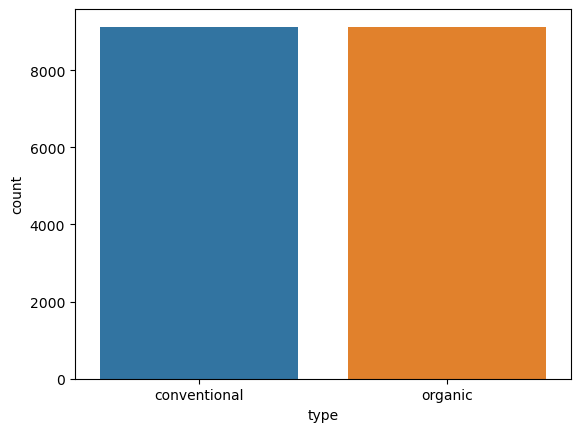

In [23]:
print(df["type"].value_counts())
sns.countplot(x=df["type"])
plt.show()

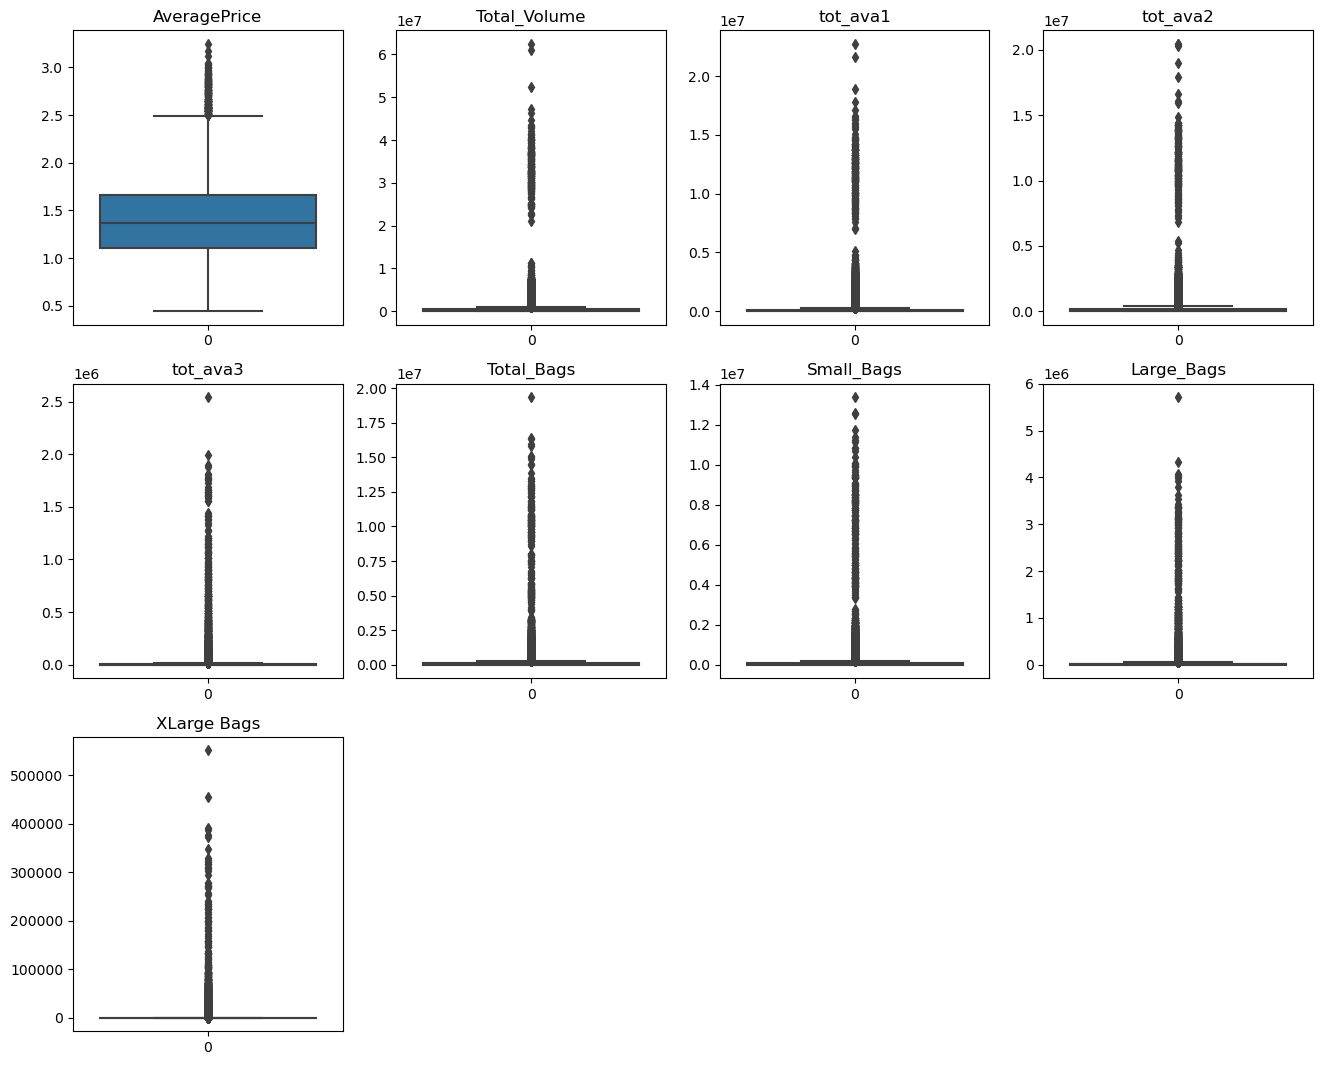

In [25]:
i=1
cols=['AveragePrice',
 'Total_Volume',
 'tot_ava1',
 'tot_ava2',
 'tot_ava3',
 'Total_Bags',
 'Small_Bags',
 'Large_Bags',
 'XLarge Bags']
plt.figure(figsize=(16,13))
for col in cols:
    plt.subplot(3,4,i)
    sns.boxplot(df[col])
    plt.title(col)
    i=i+1

In [24]:
list(df.describe().columns)

['AveragePrice',
 'Total_Volume',
 'tot_ava1',
 'tot_ava2',
 'tot_ava3',
 'Total_Bags',
 'Small_Bags',
 'Large_Bags',
 'XLarge Bags',
 'year']

In [27]:
from feature_engine.outliers import Winsorizer
for col in cols:
    winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=col,tail="both")
    df[col]=winsor.fit_transform(df[[col]])

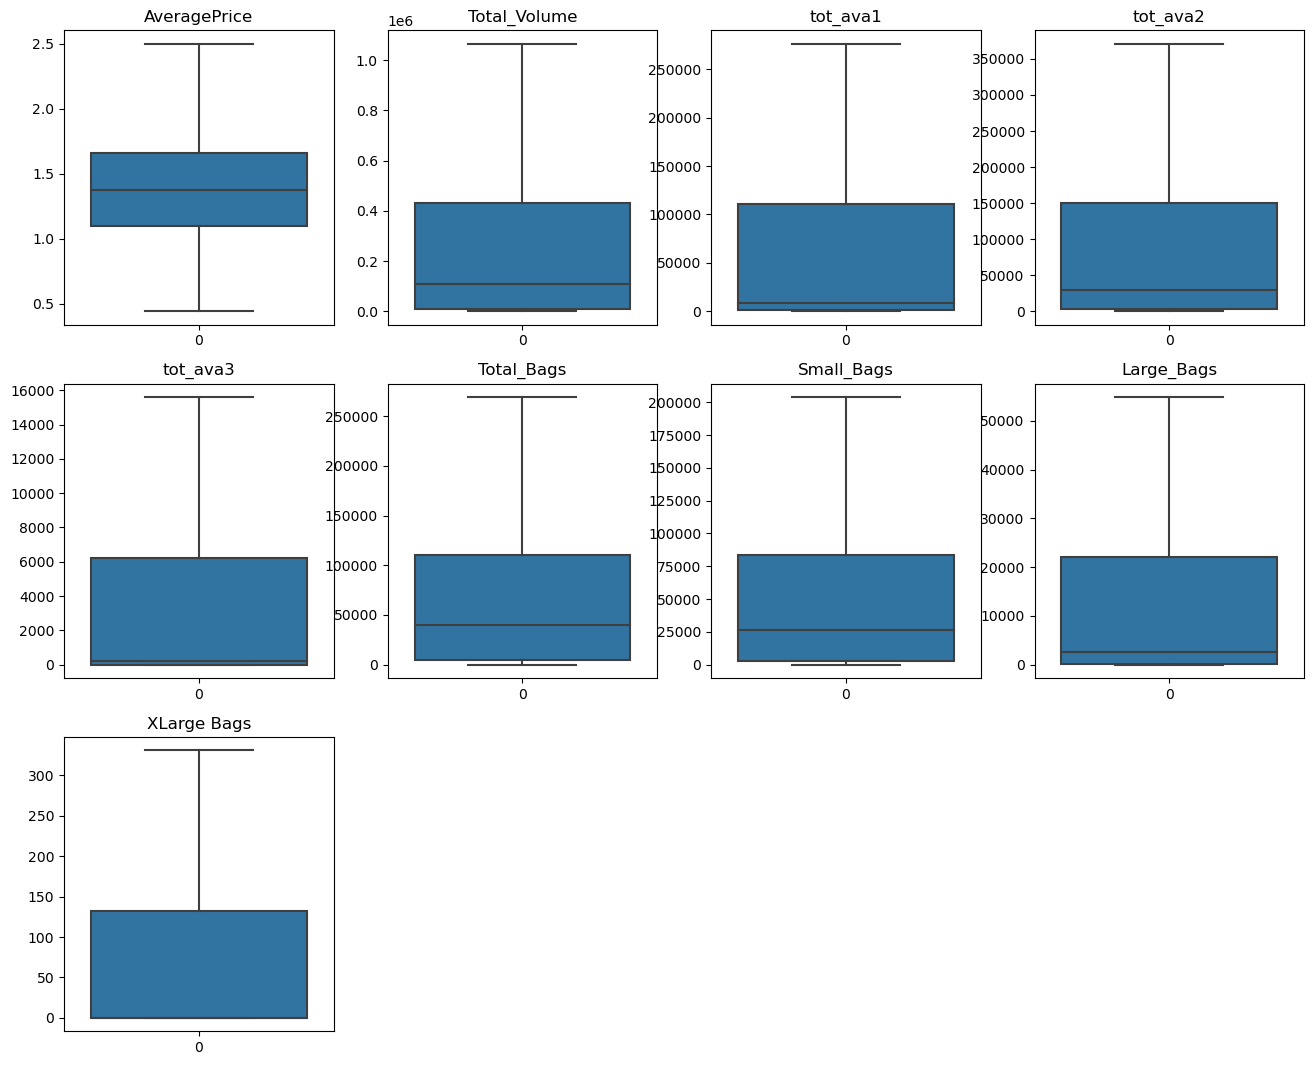

In [29]:
i=1
plt.figure(figsize=(16,13))
for col in cols:
    plt.subplot(3,4,i)
    sns.boxplot(df[col])
    plt.title(col)
    i=i+1
# outliers are removed

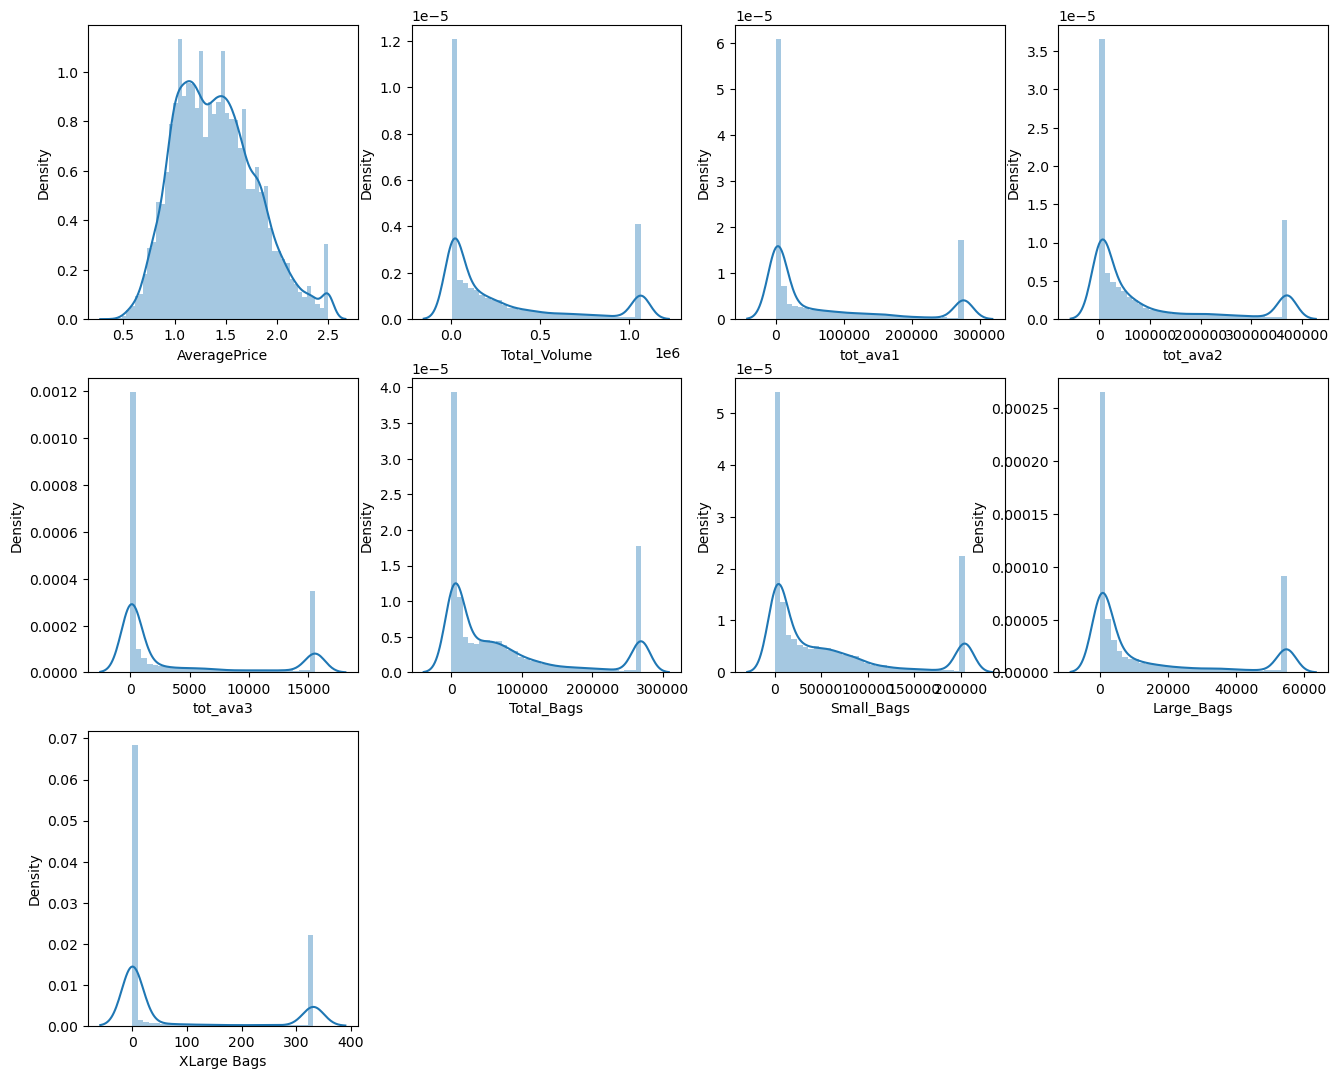

In [30]:
i=1
plt.figure(figsize=(16,13))
for col in cols:
    plt.subplot(3,4,i)
    sns.distplot(df[col])
    i=i+1

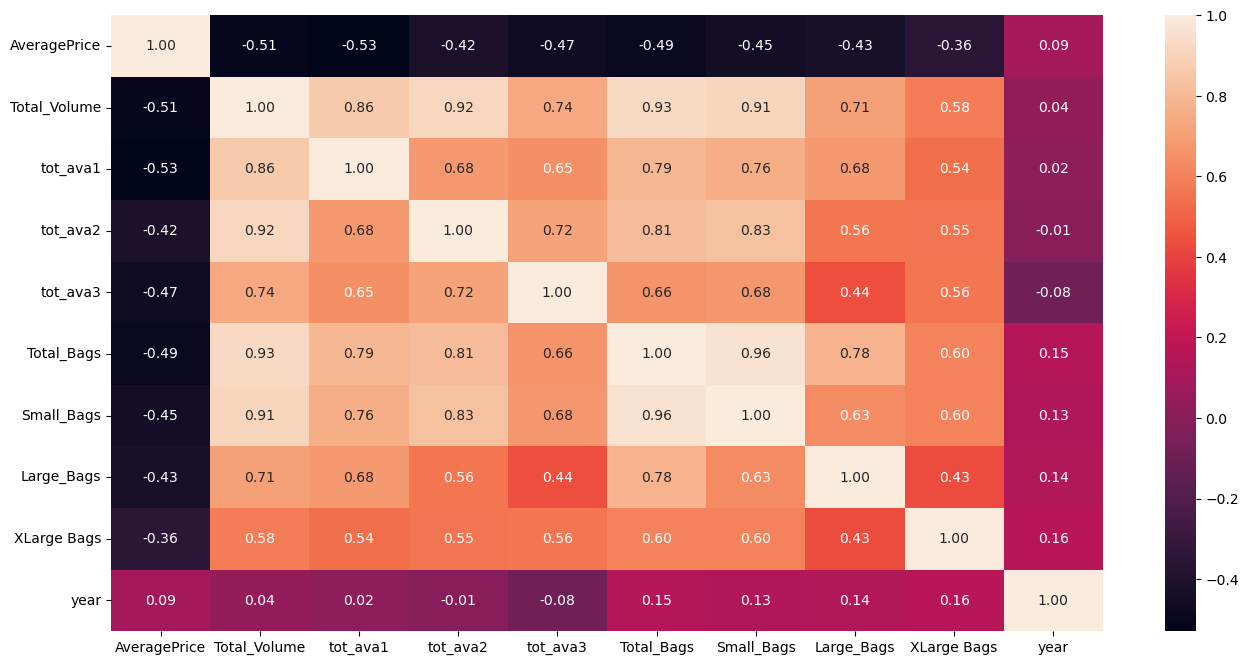

In [34]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt="0.02f")
plt.show()
#all columns have weak correlation with each other

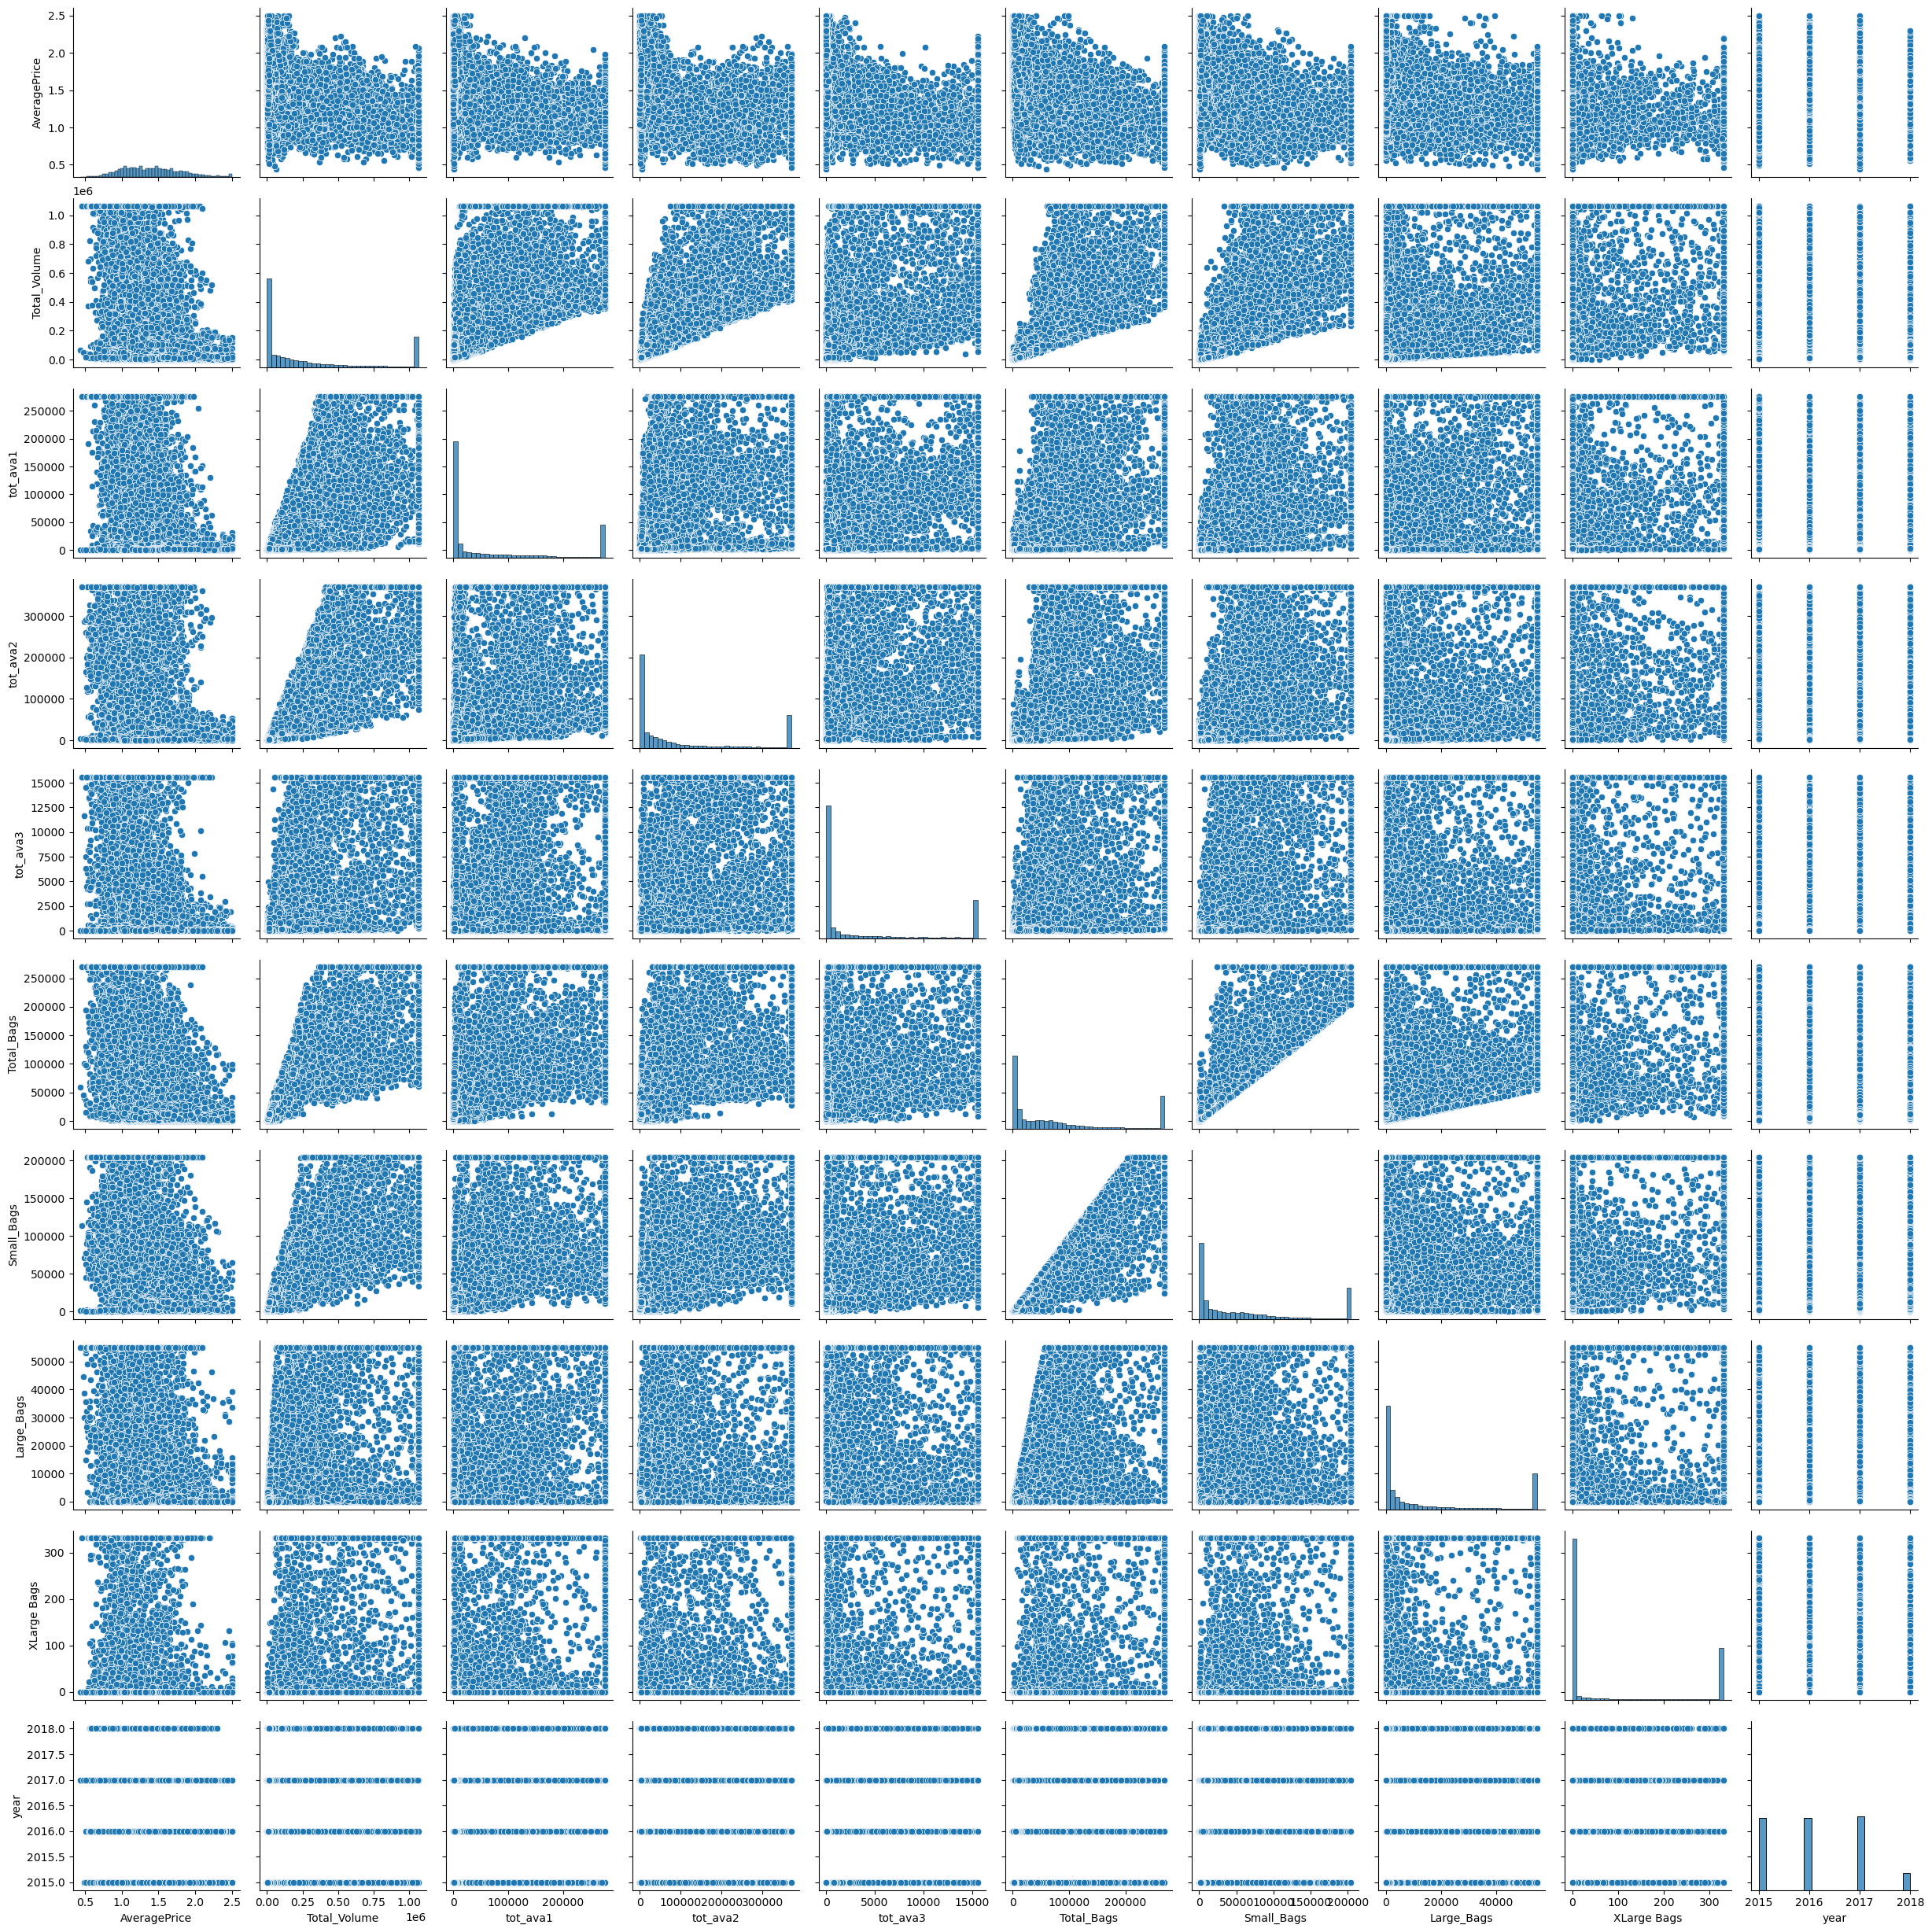

In [35]:
sns.pairplot(df)
plt.show()

In [38]:
lb=LabelEncoder()
df["type"]=lb.fit_transform(df["type"])
df["region"]=lb.fit_transform(df["region"])

In [36]:
# Apply Model

In [39]:
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [40]:
x.head()

Total_Volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  Small_Bags  \
0      64236.62   1036.74   54454.85     48.16     8696.87     8603.62   
1      54876.98    674.28   44638.81     58.33     9505.56     9408.07   
2     118220.22    794.70  109149.67    130.50     8145.35     8042.21   
3      78992.15   1132.00   71976.41     72.58     5811.16     5677.40   
4      51039.60    941.48   43838.39     75.78     6183.95     5986.26   

   Large_Bags  XLarge Bags  type  year  region  
0       93.25          0.0     0  2015       0  
1       97.49          0.0     0  2015       0  
2      103.14          0.0     0  2015       0  
3      133.76          0.0     0  2015       0  
4      197.69          0.0     0  2015       0

In [42]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x))
x.head()

0         1         2         3         4         5         6   \
0 -0.607128 -0.690114 -0.332446 -0.646057 -0.744399 -0.701162 -0.703685   
1 -0.632411 -0.693767 -0.406178 -0.644361 -0.735706 -0.689621 -0.703476   
2 -0.461299 -0.692553  0.078387 -0.632323 -0.750328 -0.709217 -0.703196   
3 -0.567268 -0.689155 -0.200835 -0.641984 -0.775421 -0.743145 -0.701682   
4 -0.642778 -0.691074 -0.412191 -0.641450 -0.771413 -0.738713 -0.698521   

         7         8         9         10  
0 -0.600511 -0.999836 -1.221282 -1.700252  
1 -0.600511 -0.999836 -1.221282 -1.700252  
2 -0.600511 -0.999836 -1.221282 -1.700252  
3 -0.600511 -0.999836 -1.221282 -1.700252  
4 -0.600511 -0.999836 -1.221282 -1.700252

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred=model.predict(x_test)

In [47]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.0832421253088074


In [48]:
r2=r2_score(y_test,y_pred)
print(r2)

0.46653714386346756


In [49]:
model.score(x_test,y_test)

0.46653714386346756

In [50]:
model.score(x_train,y_train)

0.45584117152658965

In [ ]:
# End of Assignment